# IAU Projekt 1. fáza

### Autori: Martin Raffáč (50%), Tibor Vanek (50%)

dataset číslo **003**

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pylab as pylab
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
import scipy.stats as stats
from matplotlib import pyplot
from collections import Counter

In [129]:
filename1 = "./dataset-003/measurements.csv"
measurements = pd.read_csv(filename1, sep='\t')
measurements.head()

,longitude,C2H3NO5,O3,CO,warning,Pb,PAHs,PM2.5,PRES,TEMP,latitude,NH3,H2CO,SO2,CH4,PM10,CFCs,NOx
0,30.28491,0.01960,8.26626,9.07784,0.0,46.83125,5.53330,5.37316,1101.06102,33.34540,60.02427,6.23330,54.29137,7.88335,5.85807,5.68070,28.12016,11.49560
1,120.89694,0.04735,8.35627,6.95474,1.0,48.68708,15.29667,7.42089,1141.23149,20.75105,14.95472,9.32493,53.43339,8.41893,8.32431,7.01594,82.17695,9.13370
2,141.95000,0.04530,7.47394,7.47366,1.0,60.75523,10.47662,8.29646,1117.39968,21.07022,39.46667,9.15644,31.70985,9.80100,9.24057,7.72587,19.48463,7.41425
3,15.07041,8.64588,8.50563,7.79137,0.0,54.89256,8.17284,8.34238,1175.94780,11.22310,37.49223,8.47673,58.04300,3.12505,6.73364,13.35810,55.11303,5.24699
4,-94.74049,0.02774,8.01382,9.46041,0.0,61.97648,6.41785,7.84354,1160.95559,-1.44749,32.50070,8.01924,64.31668,9.01725,6.75349,7.07762,50.38845,9.37646


In [130]:
filename2 = "./dataset-003/stations.csv"
stations = pd.read_csv(filename2, sep='\t')
stations.head()

,station,revision,QoS,longitude,code,latitude
0,Barra dos Coqueiros,2020-02-07,maintenance,-37.03861,BR,-10.90889
1,Tyoply Stan,"09/13/2018, 00:00:00",excellent,37.49338,RU,55.62047
2,Leland,2019-07-09,excellent,-78.04471,US,34.25628
3,Hermsdorf,15 Mar 2022,excellent,13.31783,DE,52.61131
4,Ulan Bator,"12/26/2016, 00:00:00",maintenance,106.88324,MN,47.90771


## 1. Základný opis dát spolu s ich charakteristikami 

V tejto časti uvedieme:  
    ● Počet záznamov, počet atribútov, ich typy,  
    ● Pre zvolené významné atribúty ich distribúcie, základné deskriptívne štatistiky a pod,  
    ● Párová analýza dát: preskúmajte vzťahy medzi zvolenými dvojicami atribútov,  
    ● Párová analýza dát: Identifikujte závislostí medzi dvojicami atribútov (napr. korelácie),  
    ● Párová analýza dát: Identifikujte závislosti medzi predikovanou premennou a ostatnými premennými (potenciálnymi prediktormi).

dataset measurements.csv obsahuje 12075 záznamov o chemických prvkoch. Počet atribútov v tomto datasete je 18. 

dataset stations.csv obsahuje 1103 záznamov o chemických prvkoch. Počet atribútov v tomto datasete je 6.

Zoznam daných atribútov:

 ●   longitude - číselná hodnota  
 ●   C2H3NO5   - číselná hodnota  
 ●   O3        - číselná hodnota  
 ●   CO        - číselná hodnota  
 ●   warning   - číselná hodnota  
 ●   Pb        - číselná hodnota  
 ●   PAHs      - číselná hodnota  
 ●   PM2.5     - číselná hodnota  
 ●   PRES      - číselná hodnota  
 ●   TEMP      - číselná hodnota  
 ●   latitude  - číselná hodnota  
 ●   NH3       - číselná hodnota  
 ●   H2CO      - číselná hodnota  
 ●   SO2       - číselná hodnota  
 ●   CH4       - číselná hodnota  
 ●   PM10      - číselná hodnota  
 ●   CFCs      - číselná hodnota  
 ●   NOx       - číselná hodnota  



In [131]:
measurements.describe()

,longitude,C2H3NO5,O3,CO,warning,Pb,PAHs,PM2.5,PRES,TEMP,latitude,NH3,H2CO,SO2,CH4,PM10,CFCs,NOx
count,12075.000000,12027.000000,12027.000000,12027.000000,12027.000000,12027.000000,12026.000000,12027.000000,12075.000000,12027.000000,12075.000000,12027.000000,12027.000000,12027.000000,12026.000000,12026.000000,12025.000000,12026.000000
mean,15.192940,0.170331,8.243161,8.226100,0.596491,50.186935,8.502031,8.229532,1124.800136,14.959069,28.472685,7.713508,47.566325,9.002650,8.492999,7.439091,51.446245,7.460853
std,74.224284,1.055270,0.996025,1.003052,0.490622,12.100899,1.931576,1.005640,43.308139,9.934451,22.845126,1.950890,13.212382,1.672296,1.986720,1.875983,13.186757,1.727860
min,-156.474320,0.000000,4.660310,4.464290,0.000000,0.000000,1.058880,4.218270,1050.001570,-21.492790,-54.800000,0.000000,0.000000,1.801440,0.233150,0.994780,0.000000,0.596490
25%,-52.355580,0.027100,7.572615,7.541400,0.000000,42.104350,7.121487,7.558260,1087.231535,8.249165,14.620720,6.370755,38.573510,8.172625,7.148212,6.165990,42.674950,6.351095
50%,11.500000,0.042240,8.243740,8.213650,1.000000,50.260780,8.562045,8.234510,1124.654680,14.956420,35.899720,7.601500,47.630350,9.221320,8.649600,7.352215,51.426230,7.304430
75%,74.122860,0.098490,8.914240,8.910910,1.000000,58.312705,9.859282,8.910315,1162.067155,21.660035,44.976390,9.037325,56.478610,10.085010,9.925450,8.647887,60.334910,8.525882
max,178.004170,100.000000,12.364080,11.627400,1.000000,100.000000,15.863860,11.944030,1199.998800,54.773100,68.798330,15.767780,100.000000,15.619170,14.350810,15.809190,100.000000,15.055640


In [132]:
len(measurements)

12075

In [133]:
len(measurements.columns)

18

In [134]:
measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12075 entries, 0 to 12074
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  12075 non-null  float64
 1   C2H3NO5    12027 non-null  float64
 2   O3         12027 non-null  float64
 3   CO         12027 non-null  float64
 4   warning    12027 non-null  float64
 5   Pb         12027 non-null  float64
 6   PAHs       12026 non-null  float64
 7   PM2.5      12027 non-null  float64
 8   PRES       12075 non-null  float64
 9   TEMP       12027 non-null  float64
 10  latitude   12075 non-null  float64
 11  NH3        12027 non-null  float64
 12  H2CO       12027 non-null  float64
 13  SO2        12027 non-null  float64
 14  CH4        12026 non-null  float64
 15  PM10       12026 non-null  float64
 16  CFCs       12025 non-null  float64
 17  NOx        12026 non-null  float64
dtypes: float64(18)
memory usage: 1.7 MB


In [135]:
stations.describe()

,longitude,latitude
count,1103.000000,1103.000000
mean,15.178244,28.546164
std,74.259394,22.830913
min,-156.474320,-54.800000
25%,-52.280985,14.625780
50%,11.500000,35.956640
75%,74.216030,44.982700
max,178.004170,68.798330


In [136]:
len(stations)

1103

In [137]:
len(stations.columns)

6

In [138]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    1103 non-null   object 
 1   revision   1103 non-null   object 
 2   QoS        1103 non-null   object 
 3   longitude  1103 non-null   float64
 4   code       1103 non-null   object 
 5   latitude   1103 non-null   float64
dtypes: float64(2), object(4)
memory usage: 51.8+ KB


## 2.1 Identifikácia problémov v dátach s prvotným riešením v datasete measurements.csv.
V tomto datasete sme našli duplicitné záznamy a chýbajúce hodnoty. 

In [139]:
# Vyhľadanie duplicitných záznamov

duplicate = measurements[measurements.duplicated()]
measurements = measurements.drop_duplicates()
print("Počet záznamov v datasete: "+str(len(measurements)))
print("V datasete sa nachádza: " + str(len(duplicate)) + " duplikátov.")

Počet záznamov v datasete: 11897
V datasete sa nachádza: 178 duplikátov.


Pomocou týchto príkazov sme zistili či sa v datasete nachádzajú duplicitné záznamy, program detegoval 178 duplikátnych záznamov.
Tieto duplikáty sme z datasetu vymazali aby nespôsobovali chyby pri neskoršej práci s dátami.


In [140]:
measurements.isnull().sum()

longitude     0
C2H3NO5      48
O3           48
CO           48
warning      48
Pb           48
PAHs         48
PM2.5        48
PRES          0
TEMP         48
latitude      0
NH3          48
H2CO         48
SO2          48
CH4          48
PM10         48
CFCs         48
NOx          48
dtype: int64

Z tejto štatistiky vyplýva, že viacero atribútov má nulové hodnoty. Polia s nulovou hodnotou sme nahradili priemerom zo stĺpca aby sme neprišli o dáta.

In [141]:
C2H3NO5_mean = measurements['C2H3NO5'].mean()
measurements['C2H3NO5'] = measurements['C2H3NO5'].fillna(C2H3NO5_mean)
O3_mean = measurements['O3'].mean()
measurements['O3'] = measurements['O3'].fillna(O3_mean)
CO_mean = measurements['CO'].mean()
measurements['CO'] = measurements['CO'].fillna(CO_mean)
Pb_mean = measurements['Pb'].mean()
measurements['Pb'] = measurements['Pb'].fillna(Pb_mean)
PAHs_mean = measurements['PAHs'].mean()
measurements['PAHs'] = measurements['PAHs'].fillna(PAHs_mean)
PM25_mean = measurements['PM2.5'].mean()
measurements['PM2.5'] = measurements['PM2.5'].fillna(PM25_mean)
TEMP_mean = measurements['TEMP'].mean()
measurements['TEMP'] = measurements['TEMP'].fillna(TEMP_mean)
NH3_mean = measurements['NH3'].mean()
measurements['NH3'] = measurements['NH3'].fillna(NH3_mean)
H2CO_mean = measurements['H2CO'].mean()
measurements['H2CO'] = measurements['H2CO'].fillna(H2CO_mean)
SO2_mean = measurements['SO2'].mean()
measurements['SO2'] = measurements['SO2'].fillna(SO2_mean)
CH4_mean = measurements['CH4'].mean()
measurements['CH4'] = measurements['CH4'].fillna(CH4_mean)
PM10_mean = measurements['PM10'].mean()
measurements['PM10'] = measurements['PM10'].fillna(PM10_mean)
CFCs_mean = measurements['CFCs'].mean()
measurements['CFCs'] = measurements['CFCs'].fillna(CFCs_mean)
NOx_mean = measurements['NOx'].mean()
measurements['NOx'] = measurements['NOx'].fillna(NOx_mean)

Keďže atribút warning sme nemohli nahradiť priemernou hodnotou, lebo v datasete sa vyskytoval len s hodnotami 1 alebo 0,
rozhodli sme sa vypočítať priemer a zaokruhliť ho na najbližšie celé číslo a následne toto číslo doplniť do prázdnych polí.

In [142]:
warning_avg = measurements['warning'].mean()

if warning_avg >= 0.5:
    warning_avg = 1
else:
    warning_avg = 0

measurements['warning'] = measurements['warning'].fillna(warning_avg)

In [143]:
measurements.isnull().sum()

longitude    0
C2H3NO5      0
O3           0
CO           0
warning      0
Pb           0
PAHs         0
PM2.5        0
PRES         0
TEMP         0
latitude     0
NH3          0
H2CO         0
SO2          0
CH4          0
PM10         0
CFCs         0
NOx          0
dtype: int64

Atribúty z tohoto datasetu measurements.csv majú číslené hodnoty. Atribúty longitude a latitude budeme potrebovať na spojenie s datasetom stations.csv preože tieto atribúty sú spoločné. 

## 2.2 Identifikácia problémov v dátach s prvotným riešením v datasete stations.csv. 
V tomoto datasete sme našli atribút revision, ktorý nemal korektné formátovanie.  

In [144]:
duplicate = stations[stations.duplicated()]
stations = stations.drop_duplicates()
print("Počet záznamov v datasete: "+str(len(stations)))
print("V datasete sa nachádza: " + str(len(duplicate)) + " duplikátov.")


Počet záznamov v datasete: 1103
V datasete sa nachádza: 0 duplikátov.


Zistili sme že v datasete stations.csv sa nenachádzajú žiadne duplikáty.

In [136]:
def convert_month_numbers(x):    # dictionary na spojenie nazvu s cislom mesiaca
    return {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09', 
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
    }[x]

for x in stations['revision']:
 
 # upravim datum s casom (tvary MM/DD/YYYY, hh:mm:ss)
 if(len(x)==20):
    invalidZero = x.replace(", 00:00:00", "")
    dates = invalidZero.split("/")
    newDate = dates[2] + "-" + dates[0] + "-" + dates[1]
    stations['revision'] = stations['revision'].replace(x, newDate)
 
 # upravim datum s lomitkom (tvary MM/DD/YYYY)
 elif(len(x)==10):
    stations['revision'] = stations['revision'].replace(x, x.replace("/", "-"))
  
 # upravim datum so slovom na cislo (tvary DD MMM YYYY)
 elif(len(x)==11):
    dates = x.split(" ")
    newDate = dates[2] + "-" + convert_month_numbers(dates[1]) + "-" + dates[0]
    stations['revision'] = stations['revision'].replace(x, newDate)


In [137]:
stations

,station,revision,QoS,longitude,code,latitude
0,Barra dos Coqueiros,2020-02-07,maintenance,-37.03861,BR,-10.90889
1,Tyoply Stan,2018-09-13,excellent,37.49338,RU,55.62047
2,Leland,2019-07-09,excellent,-78.04471,US,34.25628
3,Hermsdorf,2022-03-15,excellent,13.31783,DE,52.61131
4,Ulan Bator,2016-12-26,maintenance,106.88324,MN,47.90771
...,...,...,...,...,...,...
1098,Harstad,2015-06-22,average,16.54165,NO,68.79833
1099,Bushey,2017-10-11,accep,-0.36053,GB,51.64316
1100,Pahrump,2015-07-21,maintenance,-115.98391,US,36.20829
1101,Saint-Genis-Laval,2021-06-18,accep,4.79340,FR,45.69558


Zistili sme, že jednotlivé dátumy sú zadávané v rôznych formátoch, preto bolo potrebné ich všetky zjednotiť do jedného. Rozhodli sme sa pre formát: $YYYY-MM-DD$.

In [147]:
print(stations.QoS.unique())

['maintenance' 'excellent' 'accep' 'average' 'building' 'good'
 'acceptable' 'maitennce']


In [133]:
print(stations.code.unique())

['BR' 'RU' 'US' 'DE' 'MN' 'ET' 'CR' 'IN' 'TR' 'DO' 'BG' 'MX' 'CN' 'RS'
 'MG' 'BY' 'SK' 'JP' 'PH' 'YE' 'AU' 'AZ' 'PK' 'TH' 'HR' 'GB' 'CA' 'NG'
 'CU' 'LY' 'CO' 'IR' 'MY' 'BE' 'PL' 'DZ' 'EE' 'UA' 'FR' 'TL' 'JM' 'EG'
 'KZ' 'VE' 'GH' 'TZ' 'LT' 'EC' 'ES' 'UZ' 'IT' 'ID' 'AR' 'CD' 'MM' 'PR'
 'TN' 'KR' 'NO' 'UY' 'PA' 'GM' 'PT' 'SV' 'NL' 'PG' 'PE' 'DK' 'LK' 'CZ'
 'AD' 'AT' 'MK' 'KH' 'BW' 'XK' 'CG' 'CM' 'RW' 'BA' 'IL' 'MA' 'MT' 'UG'
 'IE' 'KE' 'HT' 'AF' 'TJ' 'CH' 'SL' 'SY' 'GT' 'ZA' 'CL' 'SA' 'CF' 'BO'
 'AM' 'TT' 'BD' 'DJ' 'GA' 'SD' 'SE' 'VN' 'CI' 'MQ' 'GN' 'KG' 'RO' 'VU'
 'TW' 'RE' 'NZ' 'FI']


Ďalej sme hľadali gramatické chyby v stĺpcoch *QoS* a *code*. Zistili sme, že v stĺpci *QoS* sa nachádzajú gramatické chyby. ktoré je treba opraviť.

In [149]:
stations['QoS'] = stations['QoS'].astype(str).str.replace('maitennce',"maintenance")
stations['QoS'] = stations['QoS'].astype(str).str.replace('accep',"acceptable")
stations['QoS'] = stations['QoS'].astype(str).str.replace('acceptabletabletable',"acceptable")
stations['QoS'] = stations['QoS'].astype(str).str.replace('acceptabletable',"acceptable")

In [150]:
print(stations.QoS.unique())

['maintenance' 'excellent' 'acceptable' 'average' 'building' 'good']


In [151]:
stations.isnull().sum()

station      0
revision     0
QoS          0
longitude    0
code         0
latitude     0
dtype: int64

Rovnako sme zisťovali či sa aj v tomto datasete nenachádzajú nulové hohnoty no zistili sme, že nie.

Hodnoty v dátach

<AxesSubplot:ylabel='Frequency'>

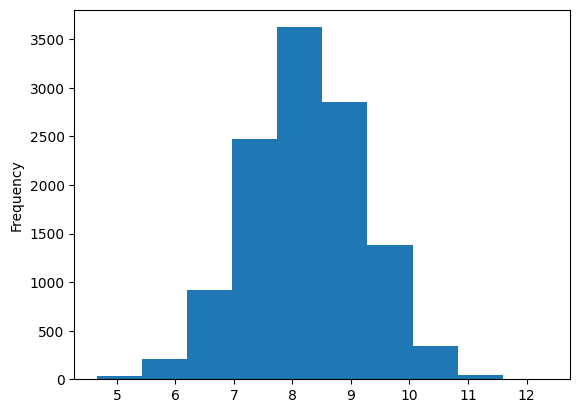

In [152]:
measurements['O3'].plot(kind='hist')

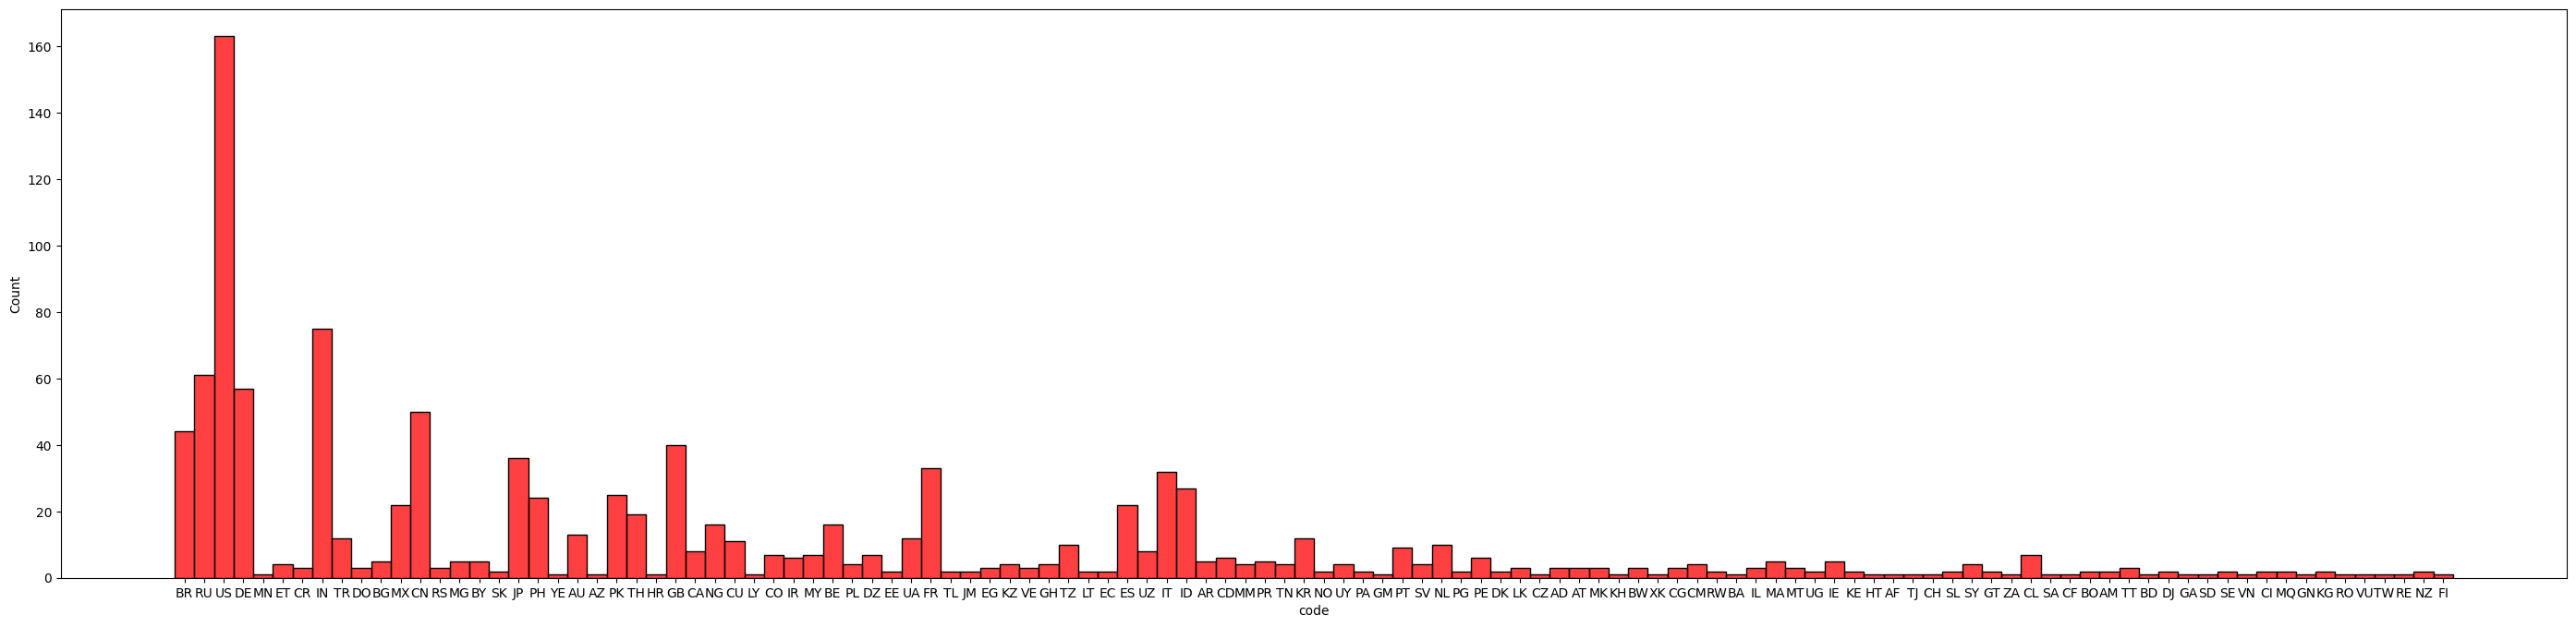

In [153]:
fig = plt.gcf()
fig.set_size_inches(35,8)
g = sns.histplot(stations['code'],bins=50, color = "red")

V tomto grafe sme sa zamerali na početnosť staníc v jednotlivých štátoch.

<AxesSubplot:xlabel='QoS', ylabel='count'>

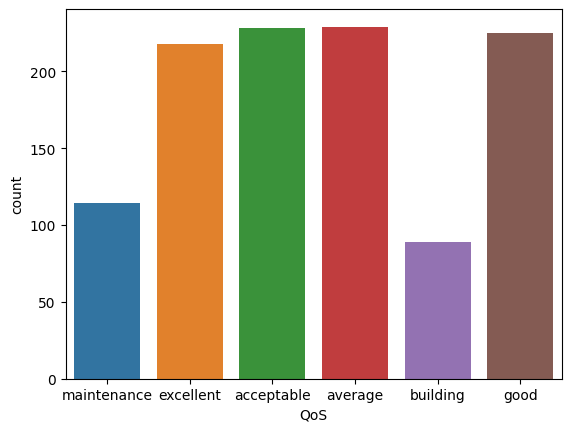

In [154]:
sns.countplot(data=stations, x="QoS")

V tomto grafe sa zameriavame na atribút *QoS*, o ktorom predpokladáme, že znázorňuje kvalitu meracej stanice (a tým pádom spoľahlivosť dát).

In [155]:
measurements.warning.describe()

count    11897.000000
mean         0.599059
std          0.490110
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: warning, dtype: float64

In [156]:
measurements['warning'].value_counts()

1.0    7127
0.0    4770
Name: warning, dtype: int64

<AxesSubplot:xlabel='warning', ylabel='count'>

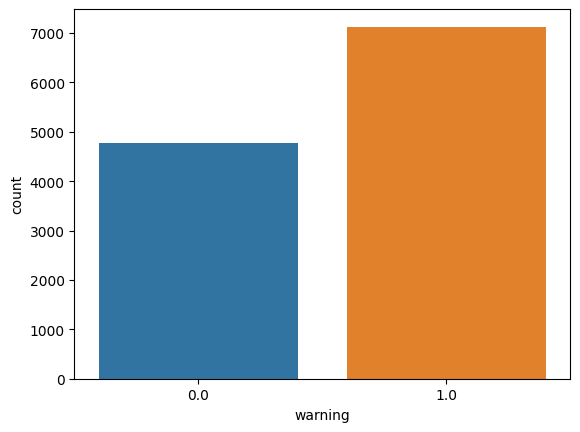

In [157]:
sns.countplot(data=measurements, x="warning")

Na tomto grafe môžeme vidieť koľko hodnôť 0 / 1 má atribút *warning*.

Relevantné atribúty

Pri vyberaní relevantnosti sme postupovali podľa stránky https://waqi.info/ kde bol spomínaný AQI (Air Quality Index), ktorý sa počíta z 6 hlavných atribútov, na ktoré sme sa aj my zamerali.

Medzi tieto atribúty patria: 

Particulate Matter ($PM2.5$ & $PM10$)  <br>
Ozone ($O3$)  <br>
Nitrogen Dioxide ($NO2$)  <br>
Sulfur Dioxide ($SO2$)  <br>
Carbon Monoxide ($CO$)  

In [159]:
measurements.head()

,longitude,C2H3NO5,O3,CO,warning,Pb,PAHs,PM2.5,PRES,TEMP,latitude,NH3,H2CO,SO2,CH4,PM10,CFCs,NOx
0,30.28491,0.01960,8.26626,9.07784,0.0,46.83125,5.53330,5.37316,1101.06102,33.34540,60.02427,6.23330,54.29137,7.88335,5.85807,5.68070,28.12016,11.49560
1,120.89694,0.04735,8.35627,6.95474,1.0,48.68708,15.29667,7.42089,1141.23149,20.75105,14.95472,9.32493,53.43339,8.41893,8.32431,7.01594,82.17695,9.13370
2,141.95000,0.04530,7.47394,7.47366,1.0,60.75523,10.47662,8.29646,1117.39968,21.07022,39.46667,9.15644,31.70985,9.80100,9.24057,7.72587,19.48463,7.41425
3,15.07041,8.64588,8.50563,7.79137,0.0,54.89256,8.17284,8.34238,1175.94780,11.22310,37.49223,8.47673,58.04300,3.12505,6.73364,13.35810,55.11303,5.24699
4,-94.74049,0.02774,8.01382,9.46041,0.0,61.97648,6.41785,7.84354,1160.95559,-1.44749,32.50070,8.01924,64.31668,9.01725,6.75349,7.07762,50.38845,9.37646


<AxesSubplot:xlabel='O3', ylabel='Count'>

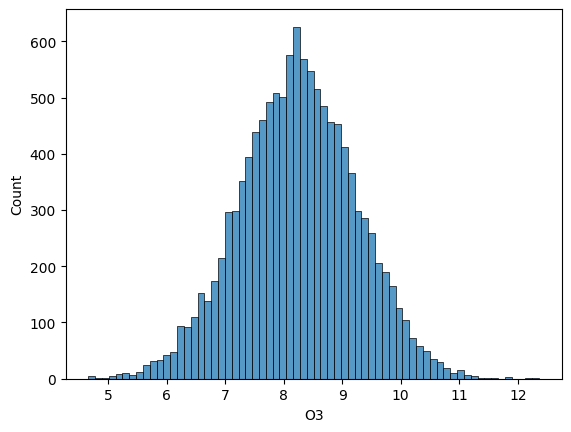

In [160]:
sns.histplot(measurements.O3)

<AxesSubplot:ylabel='O3'>

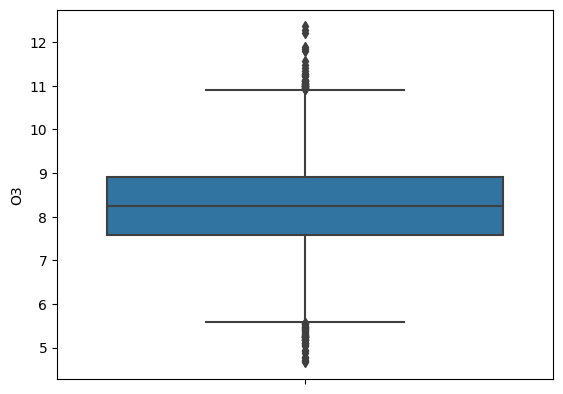

In [161]:
sns.boxplot(y=measurements.O3)

<AxesSubplot:xlabel='CO', ylabel='Count'>

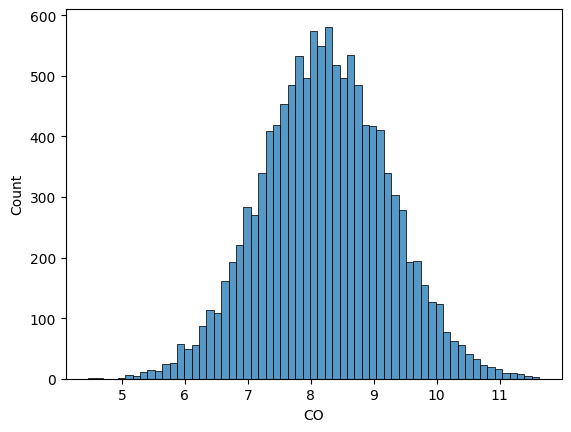

In [162]:
sns.histplot(measurements.CO)

<AxesSubplot:ylabel='O3'>

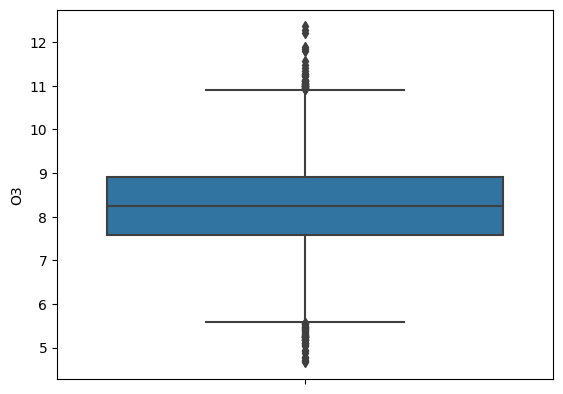

In [163]:
sns.boxplot(y=measurements.O3)

<AxesSubplot:xlabel='PM2.5', ylabel='Count'>

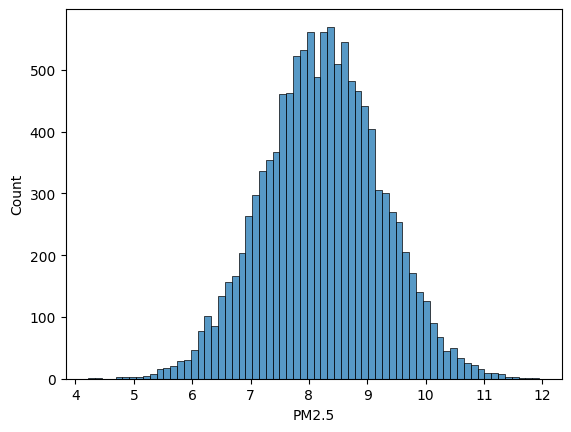

In [164]:
sns.histplot(measurements['PM2.5'])

<AxesSubplot:ylabel='PM2.5'>

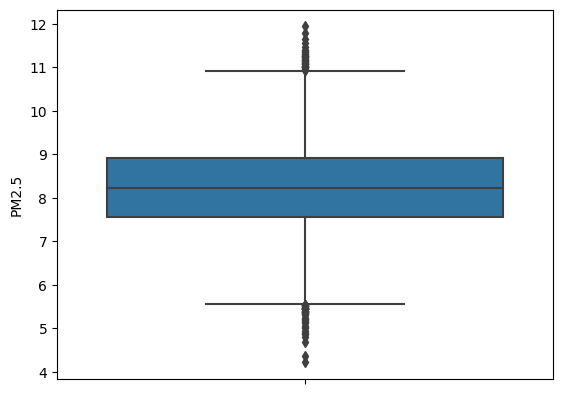

In [165]:
sns.boxplot(y=measurements['PM2.5'])

<AxesSubplot:xlabel='SO2', ylabel='Count'>

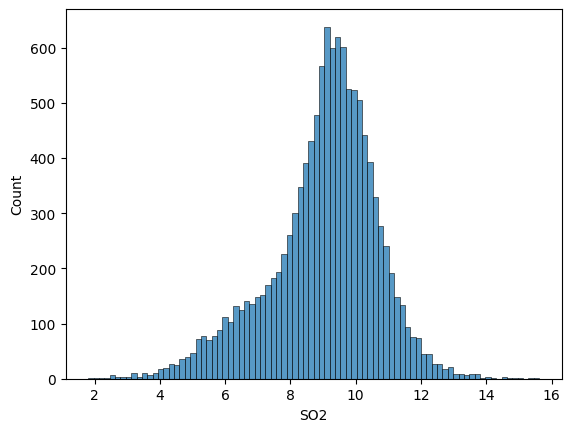

In [166]:
sns.histplot(measurements.SO2)

<AxesSubplot:ylabel='SO2'>

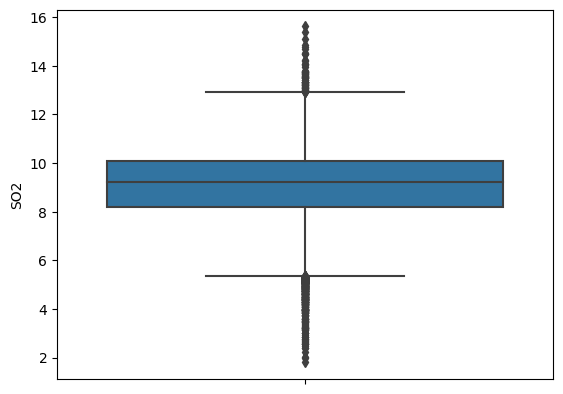

In [167]:
sns.boxplot(y=measurements.SO2)

<AxesSubplot:xlabel='PM10', ylabel='Count'>

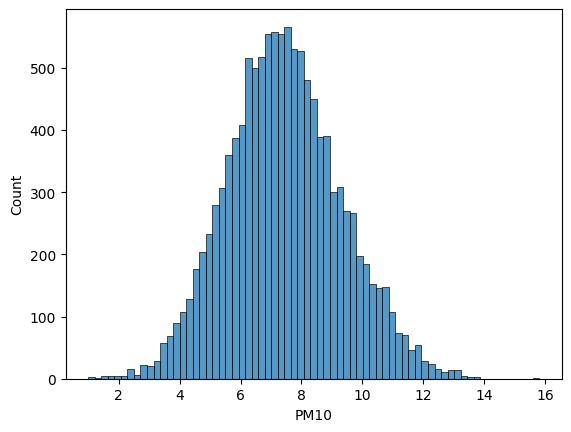

In [168]:
sns.histplot(measurements.PM10)

<AxesSubplot:ylabel='PM10'>

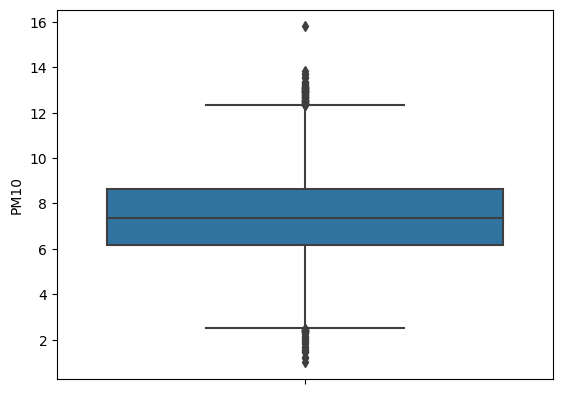

In [169]:
sns.boxplot(y=measurements.PM10)

<AxesSubplot:xlabel='PRES', ylabel='Count'>

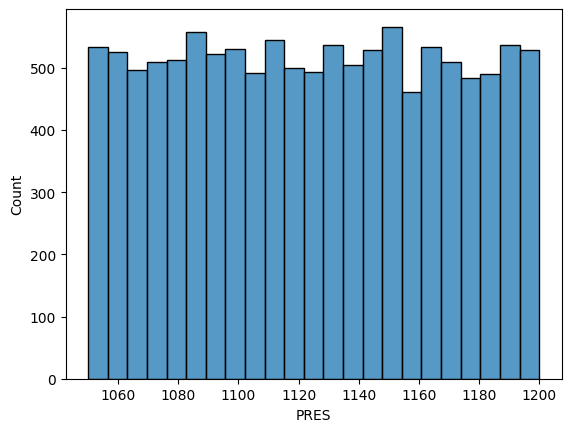

In [170]:
sns.histplot(measurements.PRES)

<AxesSubplot:ylabel='PRES'>

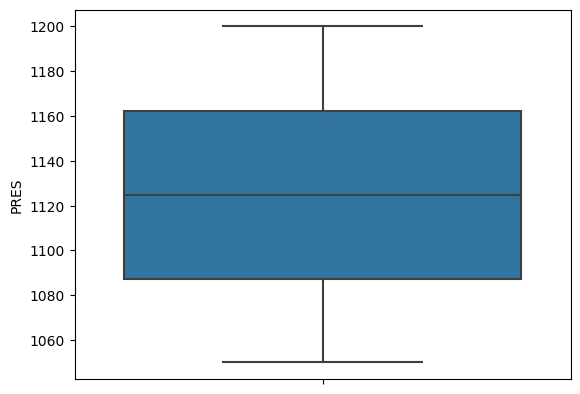

In [171]:
sns.boxplot(y=measurements.PRES)

<AxesSubplot:xlabel='TEMP', ylabel='Count'>

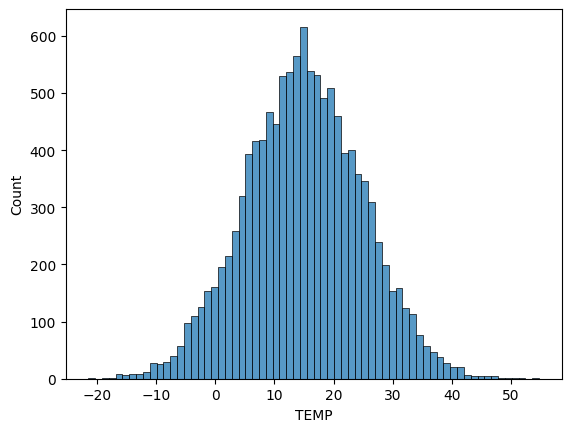

In [172]:
sns.histplot(measurements.TEMP)

<AxesSubplot:ylabel='TEMP'>

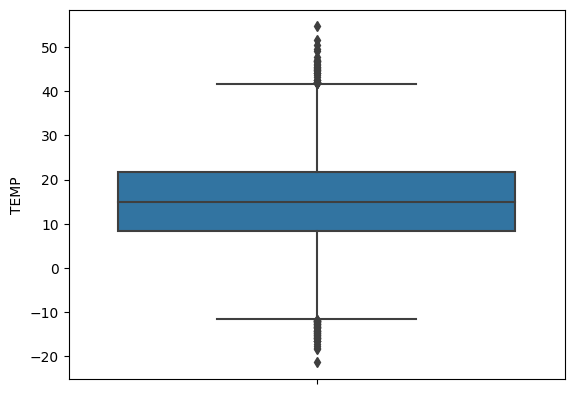

In [173]:
sns.boxplot(y=measurements.TEMP)

### Párová analýza dát

<AxesSubplot:>

<Figure size 700x700 with 0 Axes>

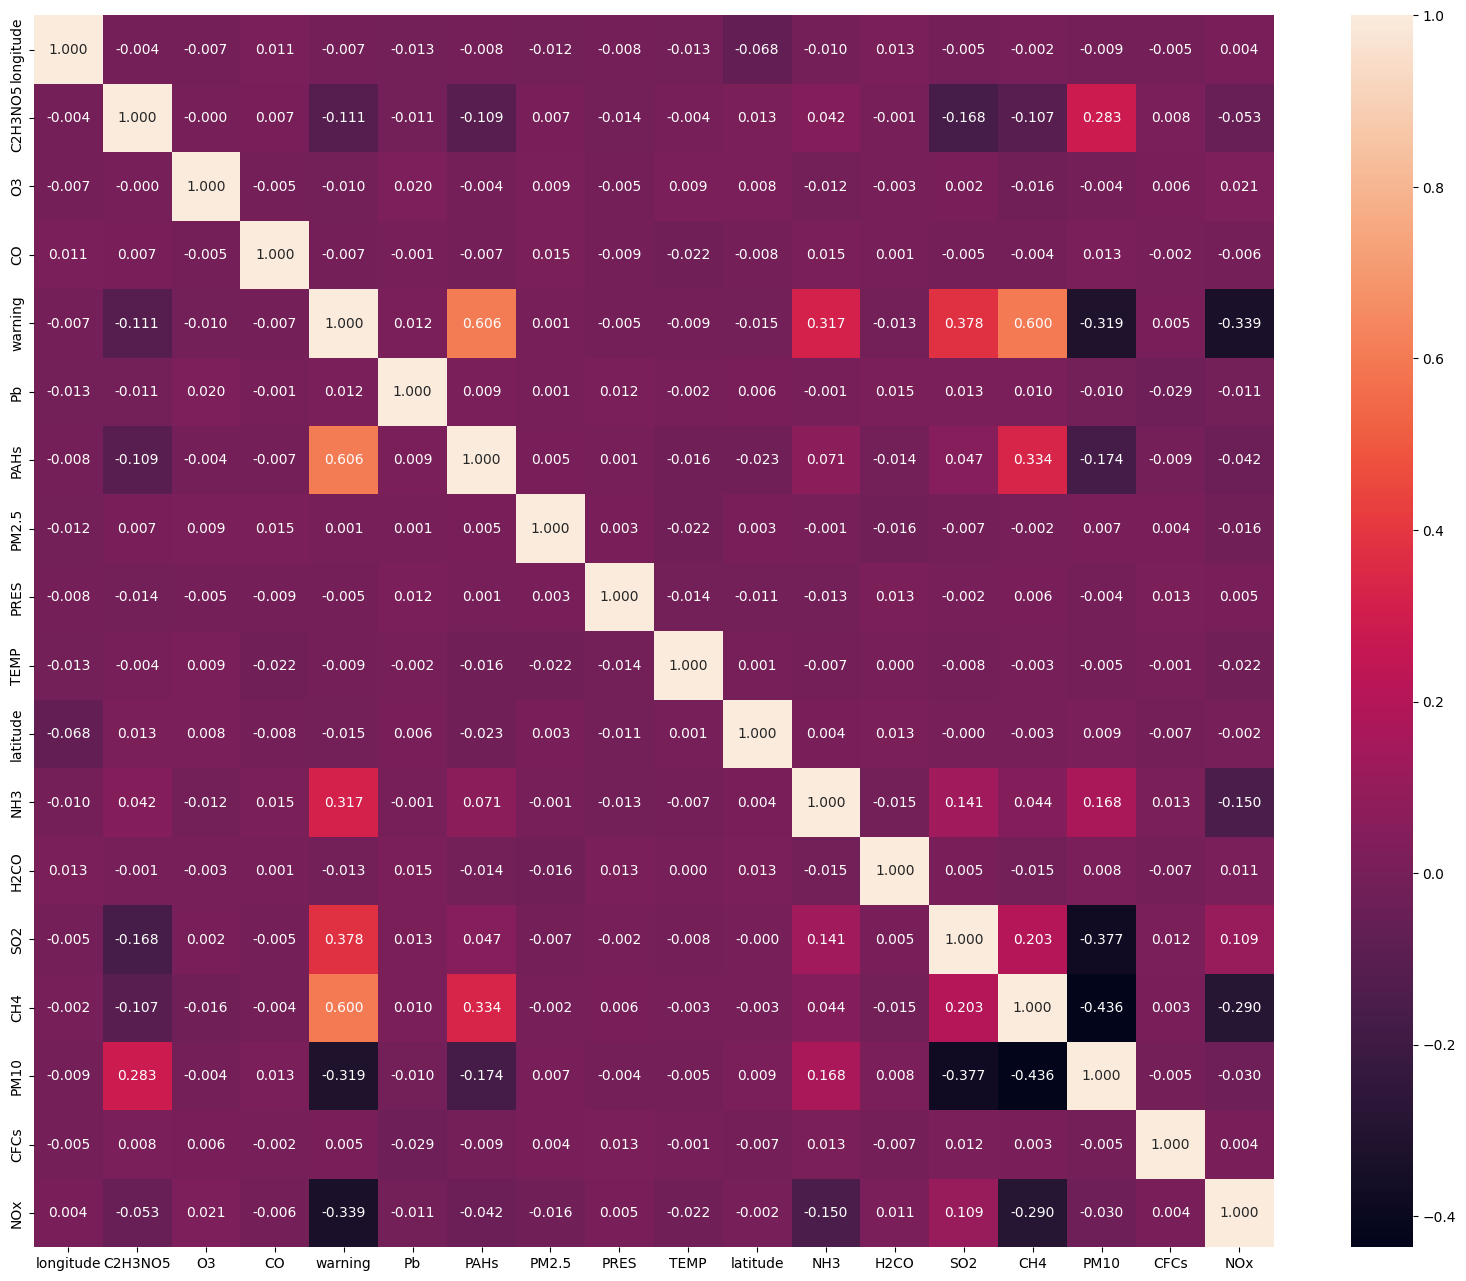

In [174]:
fig = plt.gcf()
fig.set_size_inches(7,7)
figure, ax = plt.subplots(figsize=(20,16))
sns.heatmap(measurements.corr(),ax=ax, annot =True, fmt = ".3f")

Nasledovné atribúty majú **nízku koreláciu** s ostatnými, ako môžeme vidieť z heat mapy:  
*longitude*  
*latitude*  
*O3*  
*CO*  
*Pb*  
*PM2.5*  
*PRES*  
*TEMP*  
*H2CO*  
*CFCs*  

A tieto atribúty mali nameranú **zvýšenú koreláciu** (pozitívnu alebo negatívnu):  <br>
*C2H3NO5*  
*PAHs*  
*NH3*  
*SO2*  
*CH4*  
*PM10*  
*NOx*  

Grafy závislostí na hodnote '*warning*':

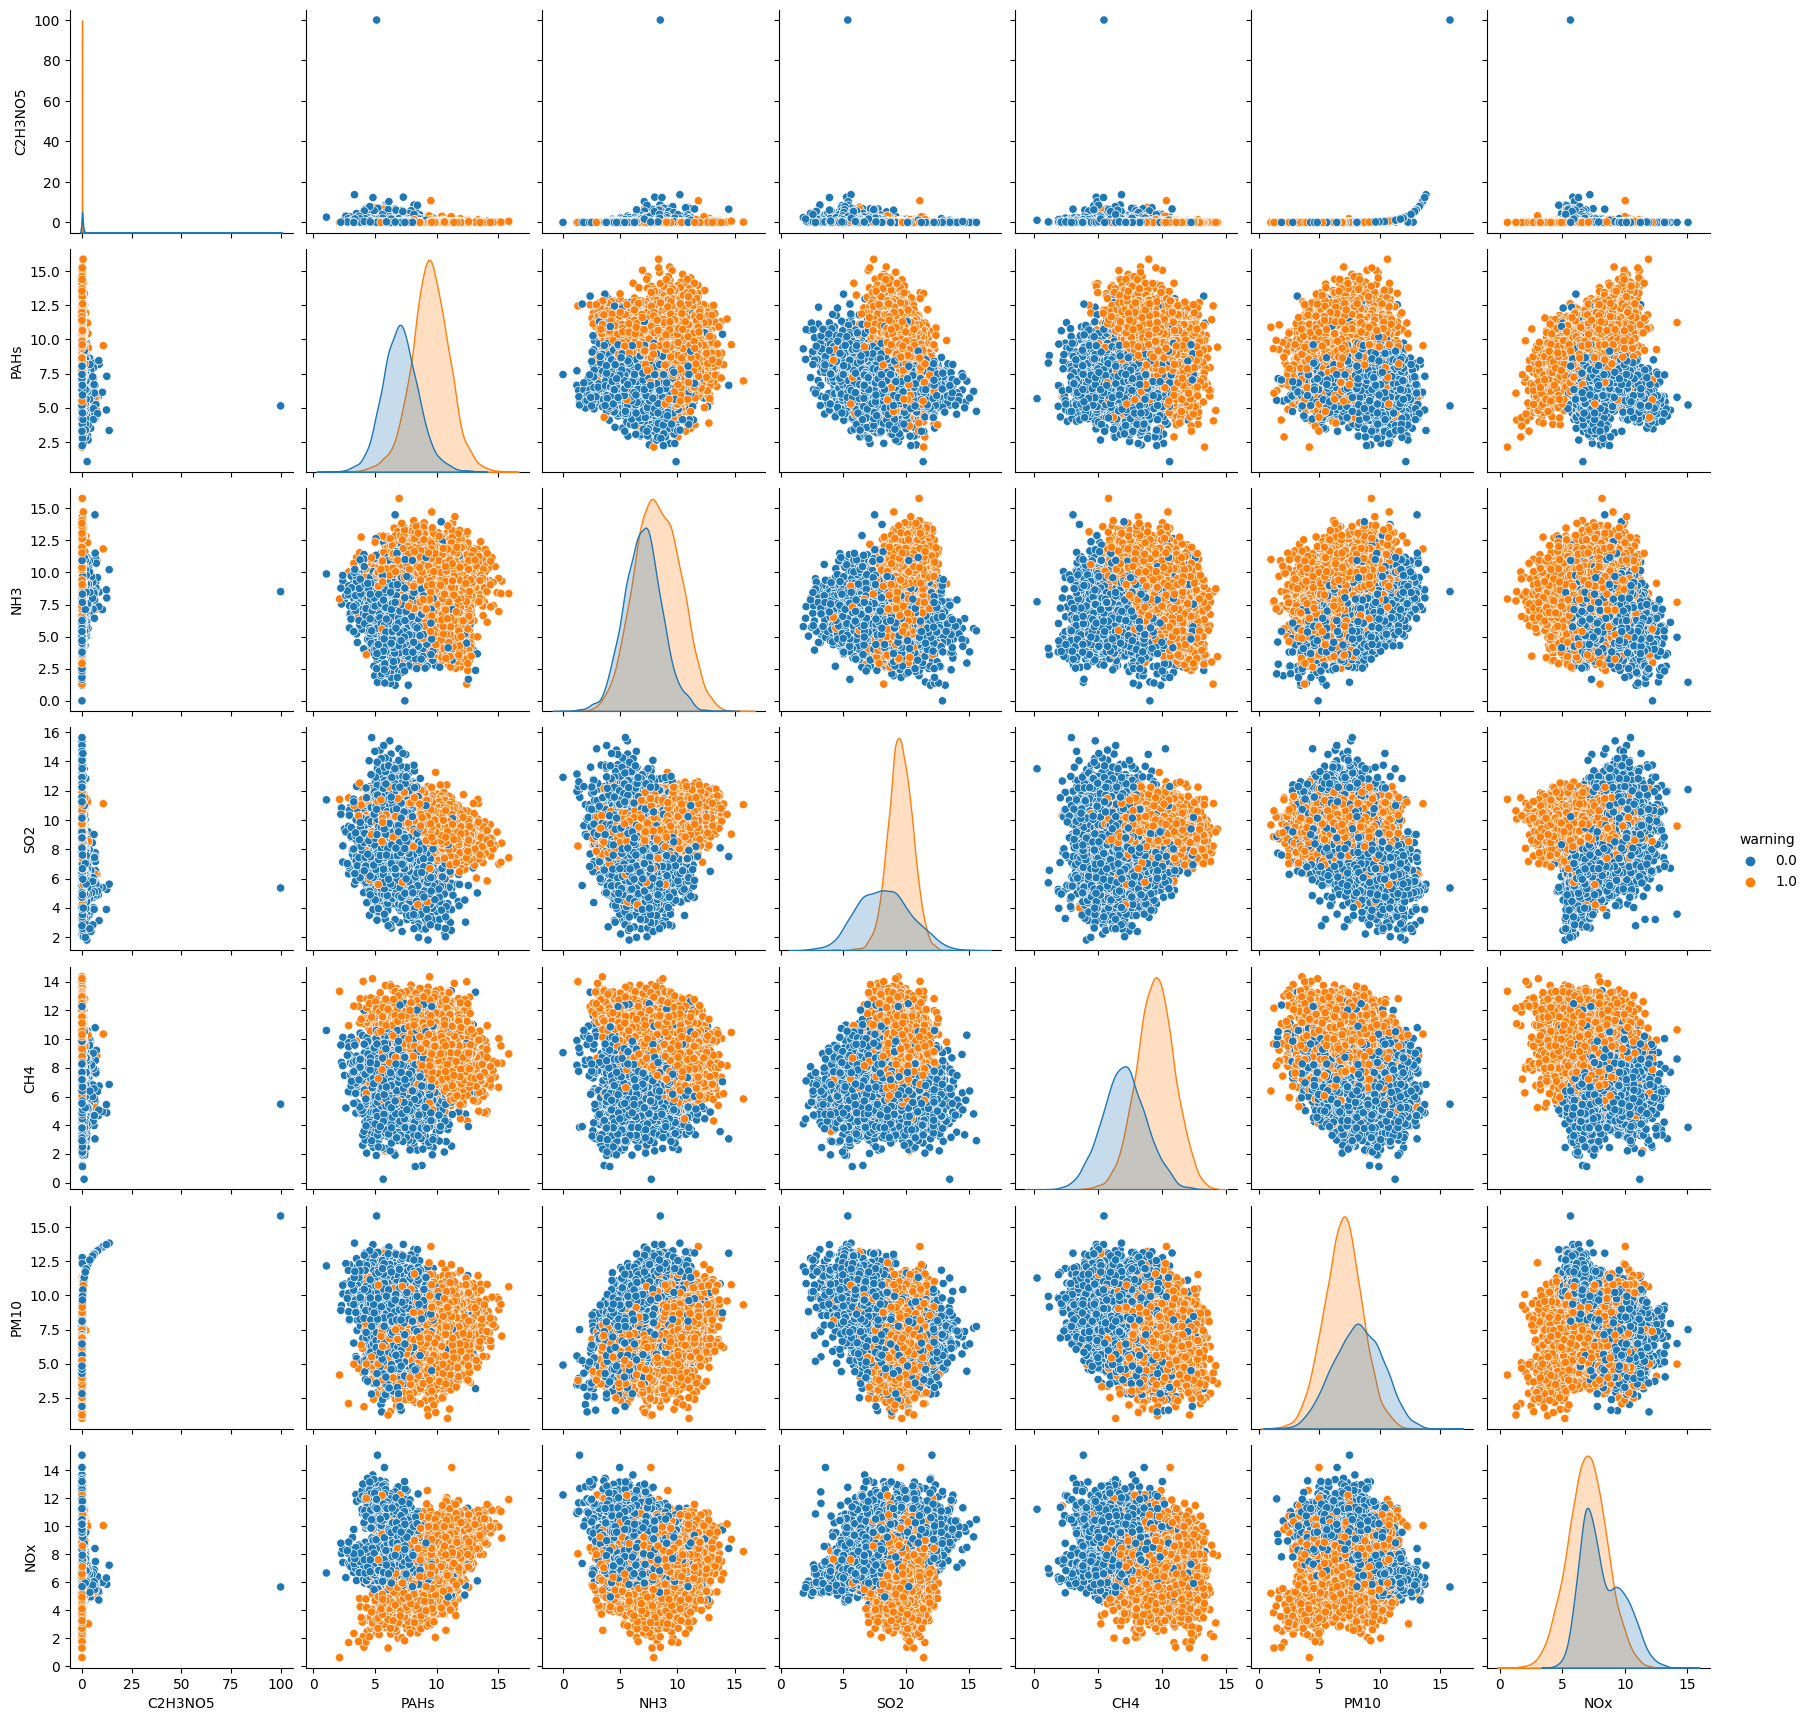

In [175]:
sns.pairplot(measurements, vars=['C2H3NO5','PAHs','NH3','SO2','CH4','PM10','NOx'], hue="warning", diag_kind="kde")

C:\Users\mraff\AppData\Local\Temp\ipykernel_79284\2039177346.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  measurements.hist(ax = ax)


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'C2H3NO5'}>,
        <AxesSubplot:title={'center':'O3'}>,
        <AxesSubplot:title={'center':'CO'}>],
       [<AxesSubplot:title={'center':'warning'}>,
        <AxesSubplot:title={'center':'Pb'}>,
        <AxesSubplot:title={'center':'PAHs'}>,
        <AxesSubplot:title={'center':'PM2.5'}>],
       [<AxesSubplot:title={'center':'PRES'}>,
        <AxesSubplot:title={'center':'TEMP'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'NH3'}>],
       [<AxesSubplot:title={'center':'H2CO'}>,
        <AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'CH4'}>,
        <AxesSubplot:title={'center':'PM10'}>],
       [<AxesSubplot:title={'center':'CFCs'}>,
        <AxesSubplot:title={'center':'NOx'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

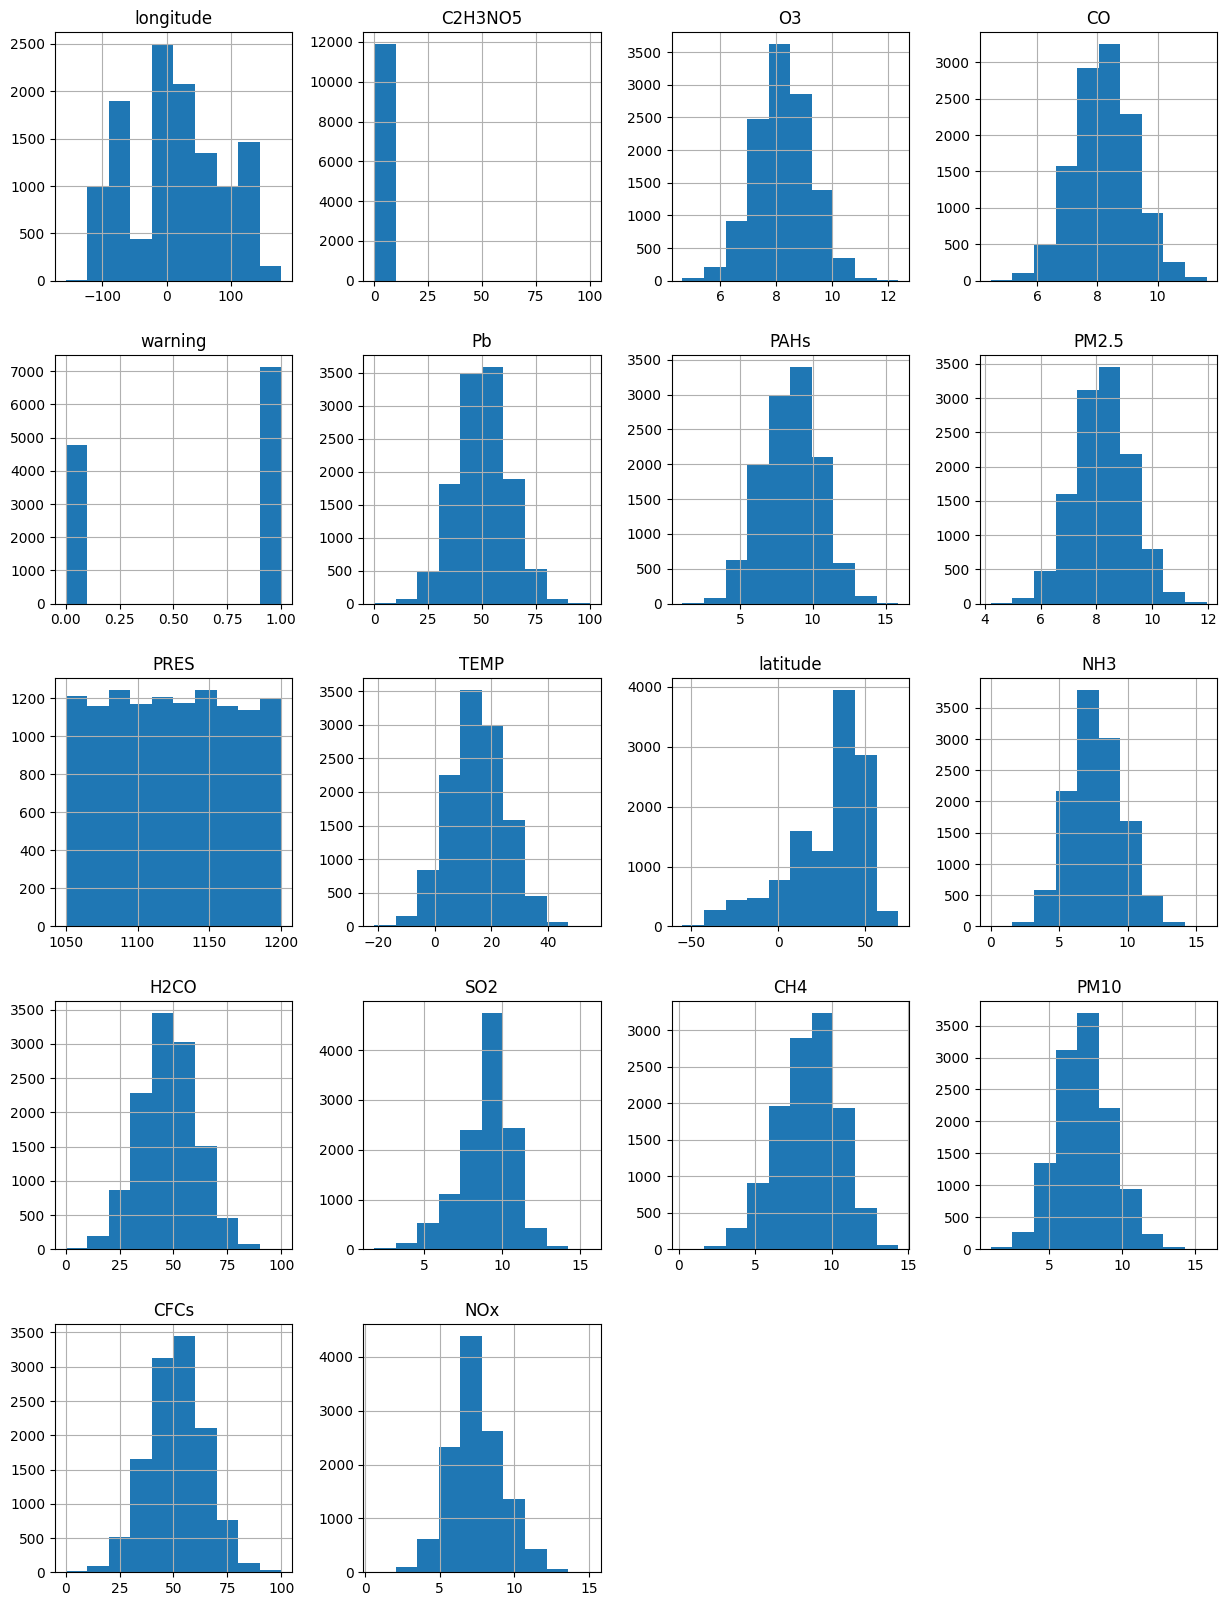

In [176]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
measurements.hist(ax = ax)

Následne sme vytvorili grafy, ktoré zobrazovali počty hodnôt atribútov

Z heat mapy sme vyčítali, že atribúty CH4 a PM10 mali najnižšiu koreláciu, dvojica PAHs a CH4 najvyššiu koreláciu a dvojica TEMP a H2CO, ktorá mala priemernú koreláciu. Preto sme sa rozhodli ďalej analyzovať práve tieto dvojice. 

<AxesSubplot:xlabel='CH4', ylabel='PM10'>

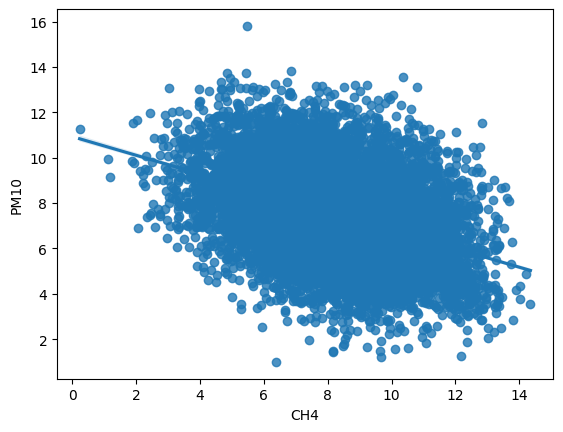

In [177]:
sns.regplot(x="CH4",y="PM10",data=measurements)

In [178]:
measurements.CH4.corr(measurements.PM10)

-0.43616537021372465

<AxesSubplot:xlabel='PAHs', ylabel='CH4'>

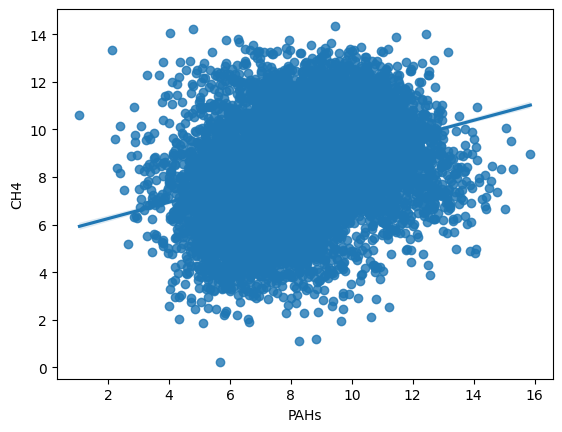

In [179]:
sns.regplot(x="PAHs",y="CH4",data=measurements)

In [180]:
measurements.PAHs.corr(measurements.CH4)

0.334195406817298

<AxesSubplot:xlabel='TEMP', ylabel='H2CO'>

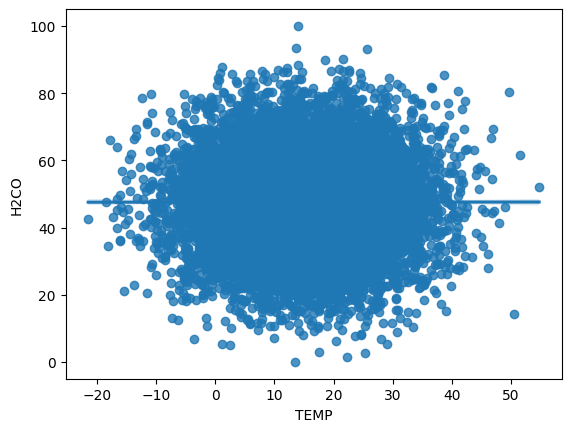

In [181]:
sns.regplot(x="TEMP",y="H2CO",data=measurements)

In [182]:
measurements.TEMP.corr(measurements.H2CO)

0.0004680449010173211

In [183]:
CO_warning = pd.crosstab(index=measurements['warning'], columns=measurements["CO"])

CO_warning

CO,4.46429,4.57069,4.63306,4.96312,5.01248,5.06726,5.06744,5.07810,5.08944,5.11574,...,11.35040,11.36885,11.38767,11.44816,11.45040,11.46306,11.50774,11.51743,11.56950,11.62740
warning,,,,,,,,,,,,,,,,,,,,,
0.0,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,1,1,1,0,1,1
1.0,1,0,0,1,0,1,0,1,1,0,...,0,1,1,1,0,0,0,1,0,0


## 3. Formulácia a štatistické overenie hypotéz o dátach

### Hypotéza 1: Hodnota CO má vplyv na kvalitu ovzdušia

In [114]:
measurements.head()

,longitude,C2H3NO5,O3,CO,warning,Pb,PAHs,PM2.5,PRES,TEMP,latitude,NH3,H2CO,SO2,CH4,PM10,CFCs,NOx
0,30.28491,0.01960,8.26626,9.07784,0.0,46.83125,5.53330,5.37316,1101.06102,33.34540,60.02427,6.23330,54.29137,7.88335,5.85807,5.68070,28.12016,11.49560
1,120.89694,0.04735,8.35627,6.95474,1.0,48.68708,15.29667,7.42089,1141.23149,20.75105,14.95472,9.32493,53.43339,8.41893,8.32431,7.01594,82.17695,9.13370
2,141.95000,0.04530,7.47394,7.47366,1.0,60.75523,10.47662,8.29646,1117.39968,21.07022,39.46667,9.15644,31.70985,9.80100,9.24057,7.72587,19.48463,7.41425
3,15.07041,8.64588,8.50563,7.79137,0.0,54.89256,8.17284,8.34238,1175.94780,11.22310,37.49223,8.47673,58.04300,3.12505,6.73364,13.35810,55.11303,5.24699
4,-94.74049,0.02774,8.01382,9.46041,0.0,61.97648,6.41785,7.84354,1160.95559,-1.44749,32.50070,8.01924,64.31668,9.01725,6.75349,7.07762,50.38845,9.37646


In [185]:
unpolluted_CO = measurements[measurements["warning"] == 0].CO
unpolluted_CO

0        9.07784
3        7.79137
4        9.46041
6        6.87217
8        8.69713
          ...   
12069    7.79442
12070    8.12159
12072    7.65376
12073    9.42900
12074    8.58298
Name: CO, Length: 4770, dtype: float64

In [186]:
polluted_CO = measurements[measurements["warning"] == 1].CO
polluted_CO

1        6.95474
2        7.47366
5        8.19794
7        7.83672
11       8.45938
          ...   
12060    7.29192
12061    7.03368
12067    6.89283
12068    7.29512
12071    7.10010
Name: CO, Length: 7127, dtype: float64

<AxesSubplot:xlabel='CO', ylabel='Count'>

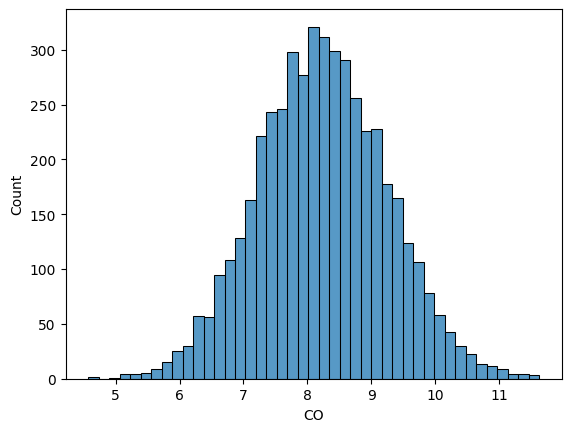

In [187]:
sns.histplot(unpolluted_CO)

<AxesSubplot:xlabel='CO', ylabel='Count'>

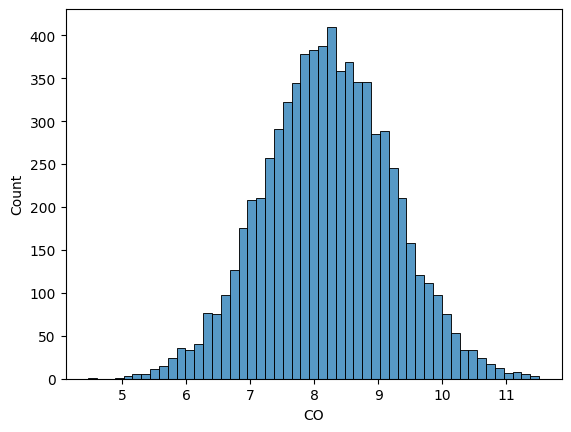

In [188]:
sns.histplot(polluted_CO)

In [112]:
#odstranenie vychylenych hodnot, urcenie hranic
unpolluted_CO = unpolluted_CO_out = unpolluted_CO[unpolluted_CO.between(unpolluted_CO.quantile(.15), unpolluted_CO.quantile(.85))]
polluted_CO = polluted_CO_out = polluted_CO[polluted_CO.between(polluted_CO.quantile(.15), polluted_CO.quantile(.85))]
unpolluted_CO_out

3        7.79137
8        8.69713
9        8.78761
14       7.76954
23       8.10695
          ...   
12066    7.77176
12069    7.79442
12070    8.12159
12072    7.65376
12074    8.58298
Name: CO, Length: 2367, dtype: float64

<AxesSubplot:xlabel='CO', ylabel='Count'>

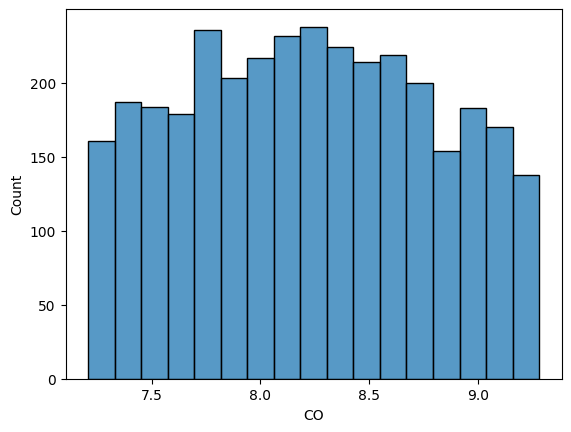

In [190]:
sns.histplot(unpolluted_CO)

<AxesSubplot:xlabel='CO', ylabel='Count'>

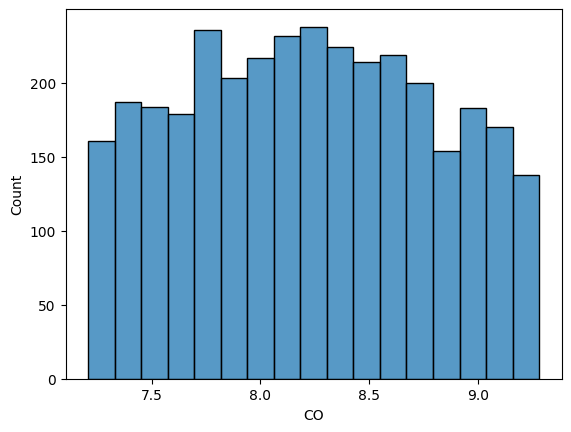

In [191]:
sns.histplot(unpolluted_CO)

V grafoch môžeme vidieť rozdiel po odstránení vychýlených hodnôt (outlierov)

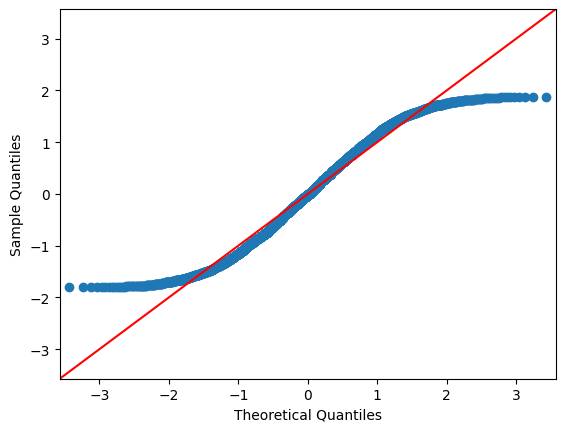

In [192]:
qq = sm.ProbPlot(unpolluted_CO, fit=True).qqplot(line='45')

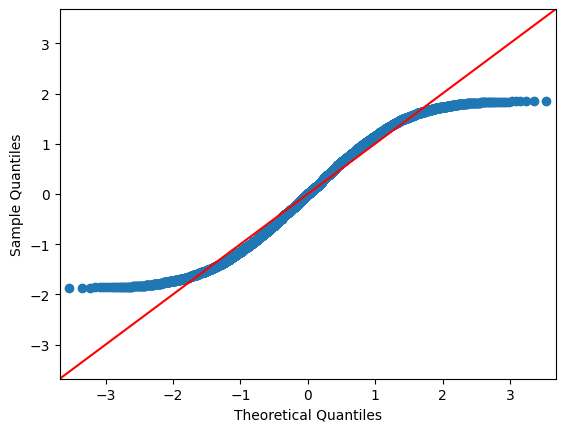

In [193]:
qq = sm.ProbPlot(polluted_CO, fit=True).qqplot(line='45')

qqplot grafy nám ukazujú, že hodnoty oboch skupín pochádzajú z rovnakého rozdelenia.

In [194]:
stats.shapiro(unpolluted_CO)

ShapiroResult(statistic=0.967851996421814, pvalue=1.0563158751188361e-26)

In [195]:
stats.shapiro(polluted_CO)

ShapiroResult(statistic=0.9684283137321472, pvalue=9.316716081079199e-32)

Oba Shapiro testy vyšli s hodnotou $pvalue < 0.05$, čiže nie sú z normálneho rozdelenia. Použijeme neparametrický test - *Mann–Whitney U test*

In [196]:
stats.mannwhitneyu(unpolluted_CO, polluted_CO)

MannwhitneyuResult(statistic=8373035.5, pvalue=0.6830814119521055)

Keďže v tomto prípade nám vyšlo $pvalue > 0.05$, znamenalo by to, že H0 nezamietame, ale skontrolujme ešte chybu / štatistickú silu.

In [197]:
def cohen_d(x1, x2):
    nx1 = len(x1)
    nx2 = len(x2)
    s = np.sqrt(((nx1-1) * np.std(x1, ddof=1)**2 + (nx2-1) * np.std(x2, ddof=1)**2) / (nx1 + nx2 - 2))
    return (np.abs(np.mean(x1) - np.mean(x2))) / s
cohen_d(unpolluted_CO, polluted_CO)

0.011295375849725241

Môžeme vidieť (už aj z heat mapy podľa korelácie), že atribút CO nemá v tomto datasete vplyv na znečistenie ovzdušia (atribút *warning*). Toto je potvrdené aj cez test štatistickej sily pomocou Cohenovho d, z ktorého vyčítame malý efekt ($c < 0.2$) a tým pádom nemá MannWhitney test dostatočnú váhu na zamietnutie / nezamietnutie hypotézy.

### Hypotéza 2: Hodnota CH4 nemá vplyv na kvalitu ovzdušia.

<AxesSubplot:xlabel='warning', ylabel='CH4'>

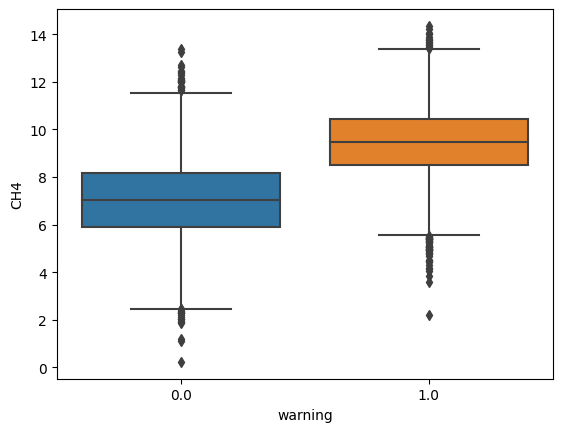

In [198]:
sns.boxplot(x= 'warning', y= 'CH4', data=measurements)

In [199]:
unpolluted_CH4 = measurements[measurements['warning']==0].CH4
polluted_CH4 = measurements[measurements['warning']==1].CH4

measurements['warning'].value_counts()

1.0    7127
0.0    4770
Name: warning, dtype: int64

<AxesSubplot:xlabel='CH4', ylabel='Count'>

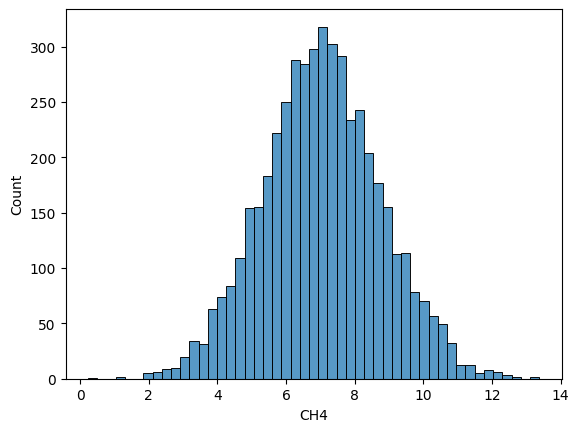

In [200]:
sns.histplot(unpolluted_CH4)

<AxesSubplot:xlabel='CH4', ylabel='Count'>

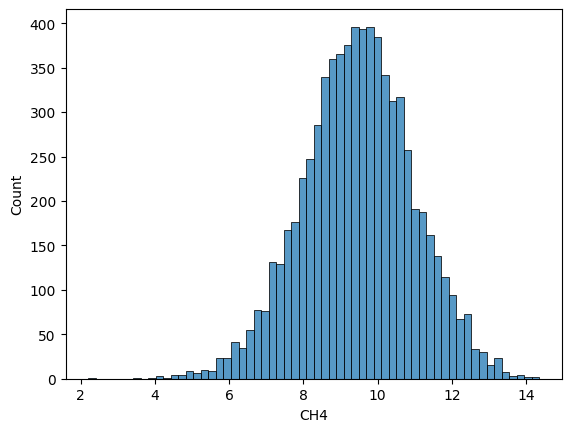

In [201]:
sns.histplot(polluted_CH4)

In [202]:
unpolluted_CH4_out = unpolluted_CH4[unpolluted_CH4.between(unpolluted_CH4.quantile(.15), unpolluted_CH4.quantile(.85))]
polluted_CH4_out = polluted_CH4[polluted_CH4.between(polluted_CH4.quantile(.15), polluted_CH4.quantile(.85))]

In [203]:
unpolluted_CH4_out.describe()

count    3338.000000
mean        7.026967
std         0.943743
min         5.265840
25%         6.261555
50%         7.030935
75%         7.766753
max         8.817400
Name: CH4, dtype: float64

In [204]:
polluted_CH4_out.describe()

count    4989.000000
mean        9.478395
std         0.810905
min         7.952980
25%         8.813130
50%         9.485970
75%        10.133080
max        10.985490
Name: CH4, dtype: float64

Bolo potrebné odstrániť outliery aby sme získali presnejšie výsledky.

<AxesSubplot:xlabel='CH4', ylabel='Count'>

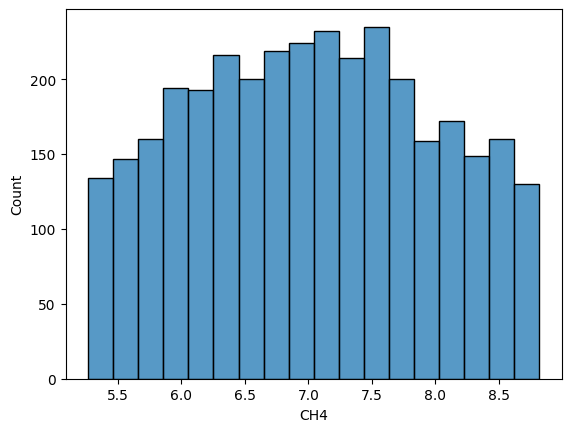

In [205]:
sns.histplot(unpolluted_CH4_out)

<AxesSubplot:xlabel='CH4', ylabel='Count'>

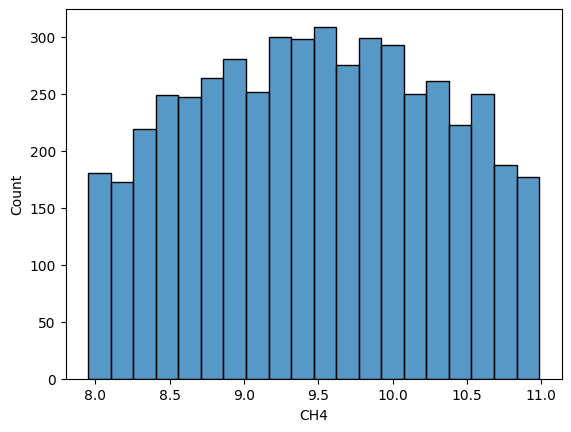

In [206]:
sns.histplot(polluted_CH4_out)

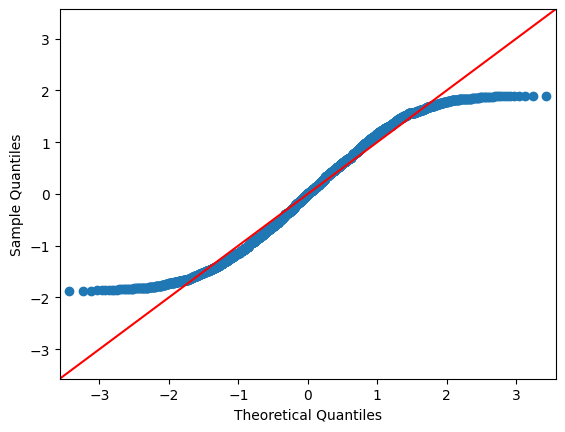

In [207]:
qq = sm.ProbPlot(unpolluted_CH4_out,fit=True).qqplot(line='45')

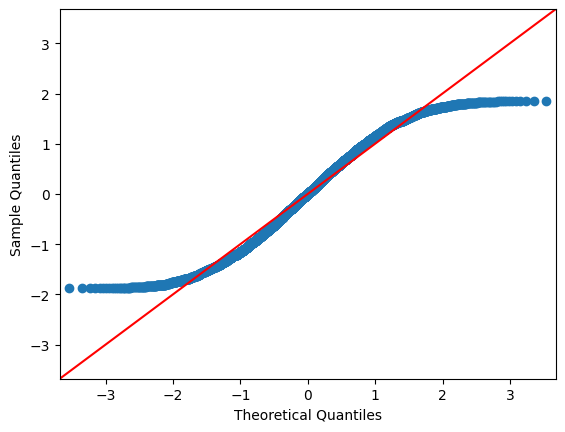

In [208]:
qq = sm.ProbPlot(polluted_CH4_out,fit=True).qqplot(line='45')

Vďaka qqplotu sme zistili, že dáta pochádzajú z rovnakého rozdelenia. 

In [209]:
stats.shapiro(unpolluted_CH4_out)

ShapiroResult(statistic=0.9713793396949768, pvalue=2.5697400367368656e-25)

In [210]:
stats.shapiro(polluted_CH4_out)

ShapiroResult(statistic=0.9698600769042969, pvalue=3.8684451736690935e-31)

Shapirovymi testami sme overovali či dáta pochádzajú z normálového rozdelenia. Zistili sme, že pvalue je v oboch prípadoch menšia ako 0.05. Z tohto dôvodu zamietame nulovú hypotézu a to znamená, že dáta pochádzajú z iného ako normálneho rozdelenia. 

In [211]:
stats.mannwhitneyu(unpolluted_CH4_out, polluted_CH4_out)

MannwhitneyuResult(statistic=364013.5, pvalue=0.0)

Keďže pvalue bola menšia ako 0.05, neboli splnené predpoklady na t test. Budeme teda aspoň skúmať, či je rozdiel medzi dátami signifikantný. Použili sme mannwhitneyov test. Hodnota pvalue bola pravdepodnobne taká malá, že ju tento test zaokruhlil na 0, z tohto dôvodu sa hypotéza H0 zamieta v prospech alternatívnej = atribút CH4 má vplyv na znečistenie ovzdušia. 

In [212]:
sms.DescrStatsW(unpolluted_CH4_out).tconfint_mean()

(6.9949397886614495, 7.058993802017058)

In [213]:
sms.DescrStatsW(polluted_CH4_out).tconfint_mean()

(9.455887730142553, 9.500901655643148)

Rozhodli sme sa ešte vypočítať vážené priemery, znečistenej a neznečistenej vzorky.

In [216]:
def cohen_d(x1, x2):
    nx1 = len(x1)
    nx2 = len(x2)
    s = np.sqrt(((nx1-1) * np.std(x1, ddof=1)**2 + (nx2-1) * np.std(x2, ddof=1)**2) / (nx1 + nx2 - 2))
    return (np.abs(np.mean(x1) - np.mean(x2))) / s
cohen_d(polluted_CH4_out, unpolluted_CH4_out)

2.828785504100226

Výsledok sme overili pomocou Cohenovho d, ktoré vyznačuje velký efekt ($> 0.8$) a tým pádom malú šancu na chybovosť testov.

## Zhrnutie:

1. Zistili sme, že v skúmaných datasetoch sa nachádzali viaceré chyby, ktoré bolo treba odstrániť pre korektnú prácu s dátami. Chyby sa týkali najmä hodnôt v iných formátoch, chýbajúcich hodnôt a duplicitných záznamov. 
2. Vyskúmali sme, že viaceré atribúty boli medzi sebou závislé a to CH4, PM10, SO2 a iné  
3. V dátach sa vyskytovali aj chýbajúce hodnoty, ktoré sme sa rozhodli po diskusii vyplniť priemerom hodôt atribútu aby sme prišli o čo najmenej dát.
4. Sformulovali sme dve hypotézy a vykonali potrebné štatistické testy na overenie záverov. 
5. Atribúty longitude a latitude nadobúdali nekonzistentné hodnoty, no bolo to vďaka tomu, že opisovali geografickú polohu. 